# PHYS 504 Computation Assignment
## Jacob Buchanan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

First define the given initial conditions as constants

In [2]:
x0 = 1
y0 = 1
z0 = 0
dx0 = 0.005
dy0 = 0.005
dz0 = 0.01

start = 0
stop = 12500

Define the given equations of motion as functions. The method I will use requires them to be written in the form $X''=f(X,Y,Z,X',Y',Z')$.

In [3]:
def d2x(x,y,z,dy,dz):
    n1 = -(np.power(x,2)+np.power(y,2)-(2*np.power(z,2)))*dy
    n2 = -3*y*z*dz
    d = np.power((np.power(x,2)+np.power(y,2)+np.power(z,2)),5/2)
    return (n1 + n2) / d

def d2y(x,y,z,dx,dz):
    n1 = (np.power(x,2)+np.power(y,2)-(2*np.power(z,2)))*dx
    n2 = 3*x*z*dz
    d = np.power((np.power(x,2)+np.power(y,2)+np.power(z,2)),5/2)
    return (n1 + n2) / d

def d2z(x,y,z,dx,dy):
    n = -3*z*((x*dy)-(y*dx))
    d = np.power((np.power(x,2)+np.power(y,2)+np.power(z,2)),5/2)
    return n / d

I will be using SciPy's solve_ivp method, which can solve a differential equation numerically given some initial conditions.

To solve second order and multivariable differential equations, the module uses vectors as the main way of storing information. The solution will be called a vector $u(\tau)=(x,y,z,x',y',z')$ where each component is a function of $\tau$. To include the second derivative, the derivative of $u$ must be considered such that $u'(\tau)=(x',y',z',x'',y'',z'')$.

$u'$ in the code is defined as a function of $\tau$ and $u$.

In [4]:
# u is some vector (x,y,z,dx,dy,dz)

def du_dt(t, u):
    # du/dt some vector (dx, dy, dz, d2x, d2y, d2z)
    return [u[3], u[4], u[5],
            d2x(u[0],u[1],u[2],u[4],u[5]),
            d2y(u[0],u[1],u[2],u[3],u[5]),
            d2z(u[0],u[1],u[2],u[3],u[4])]

Now we can ask solve_ivp to solve this. The method is called like:

solve_ivp(function, (t_start, t_stop), u0, t_eval)

where u0 is the vector of initial values of $u$ and t_eval is an optional list of points to solve at. The method returns an object of which we only need one part of: the solved vector $u$. This returned as y, a nested array with each component of $u$.

In [5]:
u0 = [x0,y0,z0,dx0,dy0,dz0]

t_pts = np.linspace(start,stop,10000)
sol = solve_ivp(du_dt, (start,stop), u0,t_eval=t_pts)
x = sol.y[0]
y = sol.y[1]
z = sol.y[2]
t = t_pts
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 48314
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.25012501e+00, 2.50025003e+00, ...,
       1.24974997e+04, 1.24987499e+04, 1.25000000e+04])
 t_events: None
        y: array([[ 1.00000000e+00,  1.00468553e+00,  1.00571014e+00, ...,
         1.06476884e+00,  1.07726753e+00,  1.08941235e+00],
       [ 1.00000000e+00,  1.00741812e+00,  1.01619910e+00, ...,
        -9.47207142e-01, -9.48253421e-01, -9.43549041e-01],
       [ 0.00000000e+00,  1.24980234e-02,  2.49471715e-02, ...,
        -3.03600216e-02, -4.62532290e-02, -6.17439841e-02],
       [ 5.00000000e-03,  2.36223832e-03, -7.80600942e-04, ...,
         9.51134869e-03,  1.01597214e-02,  8.97577394e-03],
       [ 5.00000000e-03,  6.68382341e-03,  7.15701296e-03, ...,
        -3.10652501e-03,  1.47718631e-03,  5.97093082e-03],
       [ 1.00000000e-02,  9.98834553e-03,  9.91205275e-0

Now plot the solutions of x, y, and z. There are clearly a few different frequencies going on here, and stopping at 12500 shows that.

Text(0, 0.5, 'Z')

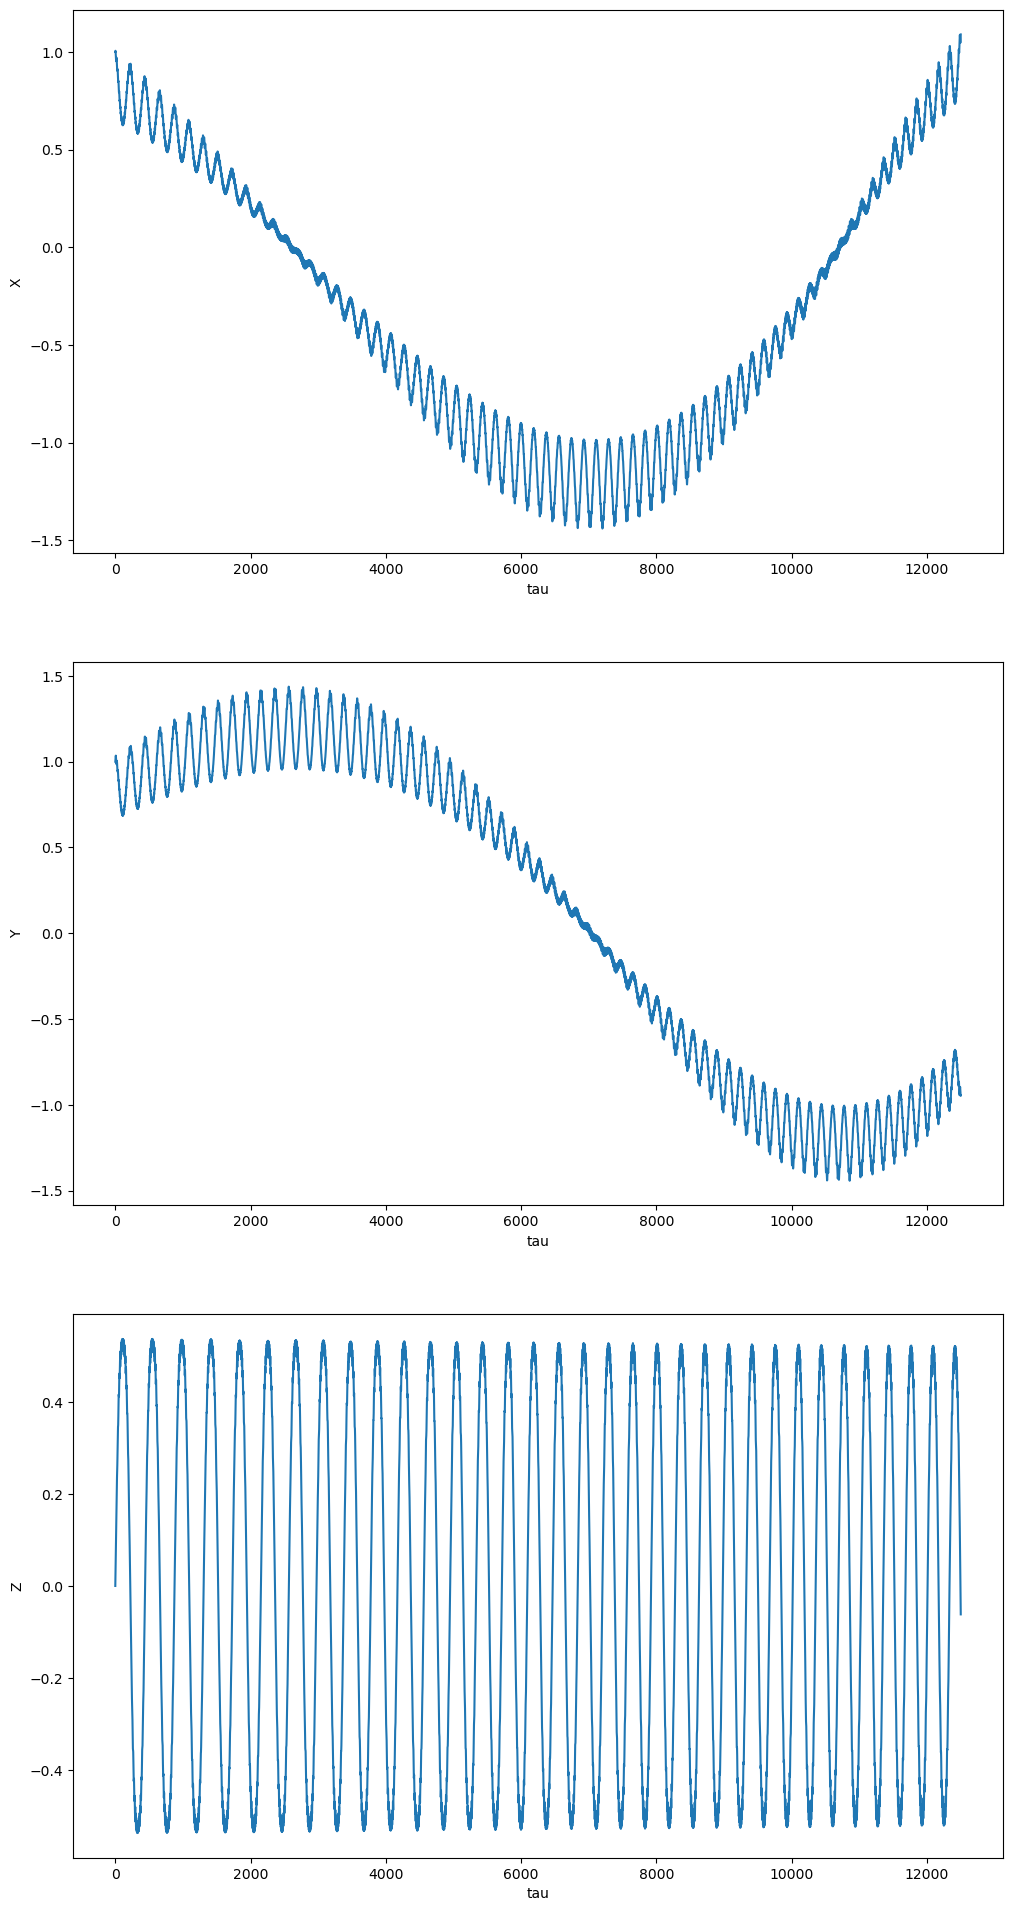

In [6]:
plt.rcParams["figure.figsize"] = (12,24)

fig, ax = plt.subplots(4,1)
plot1 = plt.subplot2grid((3,1), (0,0))
plot2 = plt.subplot2grid((3,1), (1,0))
plot3 = plt.subplot2grid((3,1), (2,0))

plot1.plot(t,x)
plot1.set_xlabel("tau")
plot1.set_ylabel("X")

plot2.plot(t,y)
plot2.set_xlabel("tau")
plot2.set_ylabel("Y")

plot3.plot(t,z)
plot3.set_xlabel("tau")
plot3.set_ylabel("Z")

Now solve until 25850 and make a 3d parametric plot.

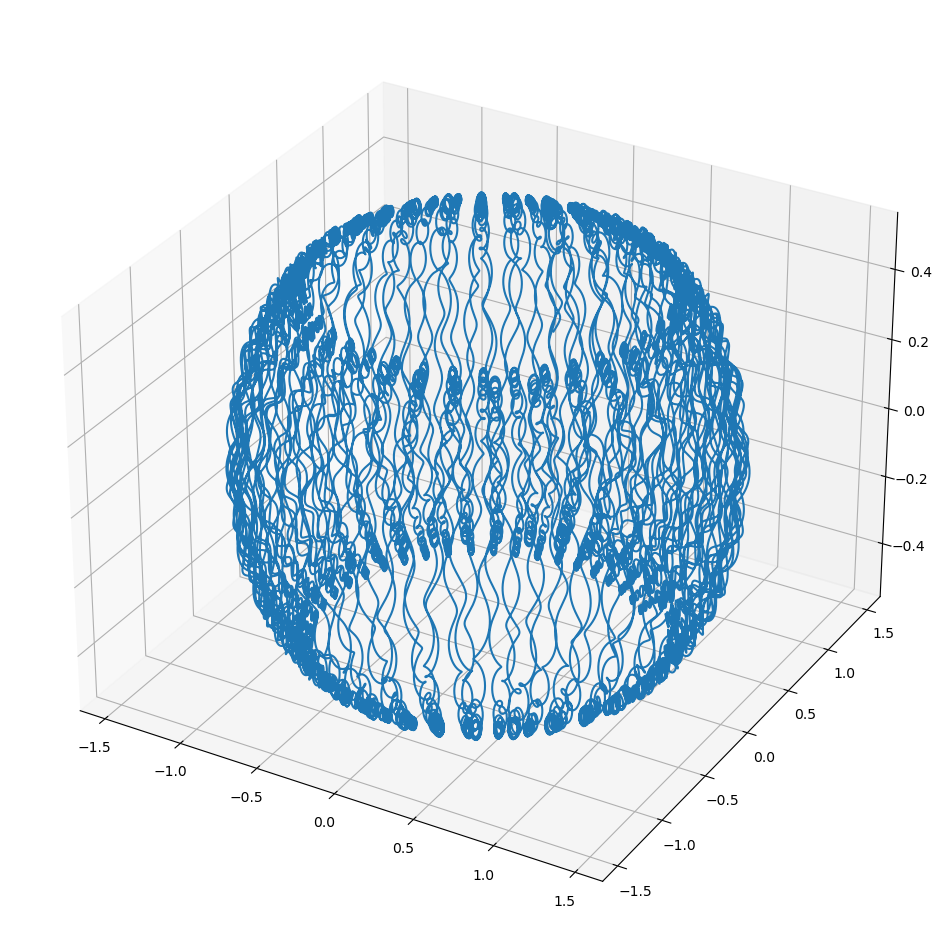

In [7]:
ax = plt.figure().add_subplot(projection="3d")

stop = 25850
t_pts = np.linspace(start,stop,100000)
sol = solve_ivp(du_dt, (start,stop), u0,t_eval=t_pts)
x = sol.y[0]
y = sol.y[1]
z = sol.y[2]
t = sol.t

plt.plot(x,y,z)
plt.show()